### Model comparison project
This project compares the performance of ML models on credit risk assesment. The data is prepared for modeling. The EDA will be found in a separate notebook.

In [18]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df  = pd.read_csv("C:/Users/User/Desktop/Mayada Kh/University/Дипломна/materials/py code/readydata.csv")
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,inq_last_6mths,pub_rec,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,fico_average,term,grade,target
0,5000.0,5000.0,4975.0,10.65,24000.0,27.65,1.0,0.0,83.7,9.0,5863.155187,5833.84,0.00,0.00,0.00,171.62,737.0,0.741507,2,1
1,2500.0,2500.0,2500.0,15.27,30000.0,1.00,5.0,0.0,9.4,4.0,1008.710000,1008.71,0.00,117.08,1.11,119.66,742.0,0.258493,3,0
2,2400.0,2400.0,2400.0,15.96,12252.0,8.72,2.0,0.0,98.5,10.0,3005.666844,3005.67,0.00,0.00,0.00,649.91,737.0,0.741507,3,1
3,10000.0,10000.0,10000.0,13.49,49200.0,20.00,1.0,0.0,21.0,37.0,12231.890000,12231.89,16.97,0.00,0.00,357.48,692.0,0.741507,3,1
4,5000.0,5000.0,5000.0,7.90,36000.0,11.20,3.0,0.0,28.3,12.0,5632.210000,5632.21,0.00,0.00,0.00,161.03,732.0,0.741507,1,1


In [20]:
df.shape

(39239, 20)

##### Check for imbalanced classes in the target feature

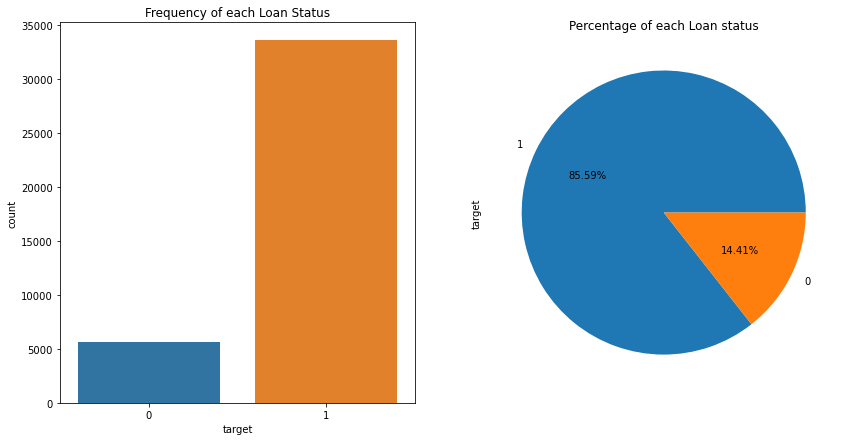

In [21]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='target',data=df,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
df.target.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

In [23]:
#define class weights to solve for imbalance 
Y = df.target
weights = sklearn.utils.class_weight.compute_class_weight('balanced', np.unique(Y), Y)
class_weight = dict(zip([0,1], weights))
class_weight

{0: 3.470635061029542, 1: 0.5841570892633835}

#### Apply flooring and capping to deal with outliers 

To check if there is a significant difference between the data before and after smoothing out outliers we will check the mean value.

In [24]:
mean_before = df.mean()
for col in df.columns:
    percentiles = df[col].quantile([0.01,0.99]).values
    df[col] = np.clip(df[col], percentiles[0], percentiles[1])

In [30]:
means = pd.DataFrame()
means['mean_before_cap_floor'] = mean_before
means['mean_after_cap_floor'] = df.mean()
means['diff'] = (abs(mean_before.values - df.mean().values)/mean_before.values)*100

means

,mean_before_cap_floor,mean_after_cap_floor,diff
loan_amnt,11134.730115,11136.456077,0.015501
funded_amnt,10863.217080,10864.952598,0.015976
funded_amnt_inv,10307.088303,10309.202434,0.020511
int_rate,11.981232,11.971730,0.079314
annual_inc,68884.323399,67152.720212,2.513784
dti,13.293984,13.281155,0.096505
inq_last_6mths,0.870359,0.859349,1.264933
pub_rec,0.055404,0.053595,3.265869
revol_util,48.675557,48.667846,0.015843
total_acc,22.072428,22.027371,0.204133


3 of the parameters have significant difference in the mean. We will build the 2 models using the dataset after applying flooring and capping and see the results 

#### Splitting the data for training and testing the models

In [31]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis =1 )
Y = df.target
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state=1)

The models will be KNN and RF

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

print('KNN Score for the training phase: ', knn.score(x_train,y_train))

print('K-Nearest Neighbors Score for the testing phase : ',knn.score(x_test,y_test))

KNN Score for the training phase:  0.9714886432416935
K-Nearest Neighbors Score for the testing phase :  0.9649592252803262


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(x_train,y_train)

print('Random Forest Score training phase : ',rf.score(x_train,y_train))

print('Random Forest Score for testing phase: ',rf.score(x_test,y_test))

Random Forest Score training phase :  1.0
Random Forest Score for testing phase:  0.9943934760448522


Those scores show that some of the features have a strong correlation with the target feature. After checking the correlation done in the previous part of the code we can see that:

1. 6 of the features have high correlation with the target and are: total_pymnt, total_pymnt_inv, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_amnt.
2. After checking the description of each of the features it turns out that all of them leak information from the future, which explains why our models were overfitting.
3. The 3 features with high difference in mean after dealing with outliers are among those 6 features

To solve this issue we will drop the feature from the dataset and move on to modeling.

In [34]:
droplist = ['total_pymnt','total_pymnt_inv','total_rec_late_fee','recoveries', 'collection_recovery_fee','last_pymnt_amnt']
df = df.drop(droplist,axis=1)

#### Building the models

In [35]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis =1 )
Y = df.target
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state=1)

##### 1. K-Nearest Neighbor

In [38]:
from sklearn.neighbors import KNeighborsClassifier
# we can check the parameters for the algorithm
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [39]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(x_train,y_train)

print('KNN Score for the training phase: ', knn.score(x_train,y_train))

print('K-Nearest Neighbors Score for the testing phase : ',knn.score(x_test,y_test))


KNN Score for the training phase:  0.8658851263100888
K-Nearest Neighbors Score for the testing phase :  0.8321865443425076


##### 2. Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [42]:
rf = RandomForestClassifier(n_estimators = 20, class_weight ='balanced')

rf.fit(x_train,y_train)

print('Random Forest Score training phase : ',rf.score(x_train,y_train))

print('Random Forest Score for testing phase: ',rf.score(x_test,y_test))


Random Forest Score training phase :  0.9973559300436431
Random Forest Score for testing phase:  0.8492609582059123


##### 3. Support Vector Machine - SVM

In [44]:
from sklearn import svm

svm.SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [147]:
clf = svm.SVC(C=0.6,class_weight= 'balanced', gamma = 0.001)

clf.fit(x_train, y_train)

print('SVM Score training phase : ',clf.score(x_train,y_train))

print('SVM Score for testing phase: ',clf.score(x_test,y_test))

SVM Score training phase :  0.9786563027619382
SVM Score for testing phase:  0.8305300713557594


##### 4. Decision Trees

In [21]:
from sklearn import tree
print(tree.DecisionTreeClassifier())
dt = tree.DecisionTreeClassifier(class_weight = 'balanced', max_depth = 30,  min_samples_split= 4)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [41]:
dt.fit(x_train, y_train)

print('Decision Trees training phase : ',dt.score(x_train,y_train))

print('Decision Trees Score for testing phase: ',dt.score(x_test,y_test))

Decision Trees training phase :  0.9789748654072823
Decision Trees Score for testing phase:  0.7576452599388379


##### 5. XGBoost

In [23]:
from xgboost import XGBClassifier

XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [50]:
#model = XGBClassifier(max_depth = 9, scale_pos_weight = 4)
model = XGBClassifier(max_depth = 9)

model.fit(x_train, y_train)

print('XGBoost Score training phase : ', model.score(x_train,y_train))

print('XGBoost Score for testing phase: ', model.score(x_test,y_test))

XGBoost Score training phase :  0.9035073747252397
XGBoost Score for testing phase:  0.8516819571865444


##### 6. Neural Network

In [76]:
from keras.models import Sequential
from keras.layers import Dense

In [81]:
model = Sequential()
model.add(Dense(13,input_dim = 13, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [82]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [83]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 30, batch_size = 80, class_weight=class_weight)

Train on 31391 samples, validate on 7848 samples
Epoch 1/30
31391/31391 [==============================] - 10s 303us/step - loss: 523.2046 - accuracy: 0.5382 - val_loss: 40.6616 - val_accuracy: 0.3579- loss: 692.7320 - ac - ETA: 1s -
Epoch 2/30
31391/31391 [==============================] - 6s 198us/step - loss: 44.4307 - accuracy: 0.5434 - val_loss: 80.3002 - val_accuracy: 0.1723
Epoch 3/30
31391/31391 [==============================] - 7s 216us/step - loss: 35.0990 - accuracy: 0.5235 - val_loss: 7.5335 - val_accuracy: 0.8324curacy: 0.524 - ETA: 2s - loss: 36.1333 - accuracy: 0.52 - ETA: 2s - loss: 35.8088 - accuracy: 0.5 - ETA: 2s - loss: 35.9319 - accuracy: 0.523 - ETA: 2s - loss: 
Epoch 4/30
31391/31391 [==============================] - 7s 233us/step - loss: 34.5961 - accuracy: 0.5159 - val_loss: 7.7721 - val_accuracy: 0.8042accuracy: 0.519 - ETA: 0s - loss: 34.746
Epoch 5/30
31391/31391 [==============================] - 7s 219us/step - loss: 22.1207 - accuracy: 0.5355 - val_loss

#### Final accuracy score 

In [84]:
scores = model.evaluate(x_test,y_test)
print('\n%s: %.2f%%'% (model.metrics_names[1], scores[1]*100))

7848/7848 [==============================] - 2s 226us/step

accuracy: 83.75%


#### adding Dropout after the hidden layer

In [106]:
from keras.layers import Dropout
model = Sequential()
model.add(Dense(13,input_dim = 13, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [107]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [108]:
model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs = 10, batch_size = 80, class_weight = class_weight)

Train on 31391 samples, validate on 7848 samples
Epoch 1/10
31391/31391 [==============================] - 3s 111us/step - loss: 336.8743 - accuracy: 0.2398 - val_loss: 1.0609 - val_accuracy: 0.1505
Epoch 2/10
31391/31391 [==============================] - 3s 86us/step - loss: 0.9029 - accuracy: 0.1441 - val_loss: 0.9119 - val_accuracy: 0.1458
Epoch 3/10
31391/31391 [==============================] - 3s 83us/step - loss: 0.8492 - accuracy: 0.1436 - val_loss: 0.8383 - val_accuracy: 0.1458
Epoch 4/10
31391/31391 [==============================] - 3s 86us/step - loss: 0.8159 - accuracy: 0.2294 - val_loss: 0.7978 - val_accuracy: 0.1458
Epoch 5/10
31391/31391 [==============================] - 3s 84us/step - loss: 0.8330 - accuracy: 0.6185 - val_loss: 0.7383 - val_accuracy: 0.1458
Epoch 6/10
31391/31391 [==============================] - 3s 86us/step - loss: 0.7154 - accuracy: 0.4362 - val_loss: 0.6932 - val_accuracy: 0.8541
Epoch 7/10
31391/31391 [==============================] - 3s 111us

Using accuracy scores is a nice way to check the models performance, however to better check how well the models did predicting the target feature confusion matrix is used.

### Building confusion matrices for each model

##### 1. Confusion Matrix for KNN predictions

Text(69.0, 0.5, 'Truth')

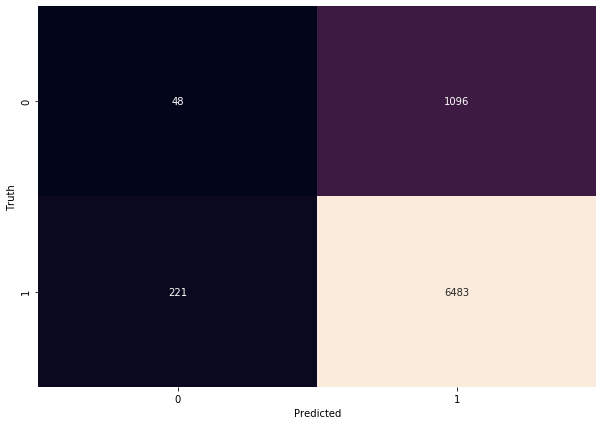

In [45]:
y_predicted  = knn.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_predicted)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, cbar=False, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

##### 2. Confusion Matrix for Random Forest predictions

Text(69.0, 0.5, 'Truth')

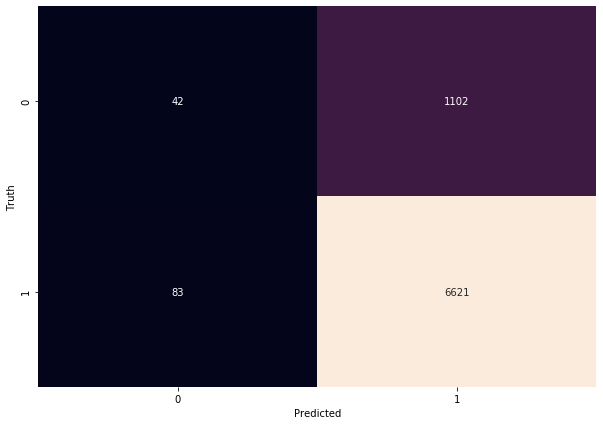

In [46]:
y_predicted  = rf.predict(x_test)
cm = confusion_matrix(y_test , y_predicted)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, cbar=False, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

##### 3. Confusion Matrix for SVM predictions

Text(69.0, 0.5, 'Truth')

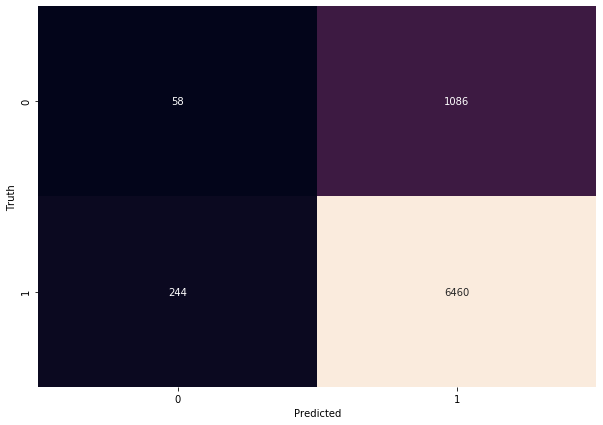

In [148]:
y_predicted  = clf.predict(x_test)
cm = confusion_matrix(y_test , y_predicted)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, cbar=False, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

##### 4. Confusion Matrix for Decision Tree predictions

Text(69.0, 0.5, 'Truth')

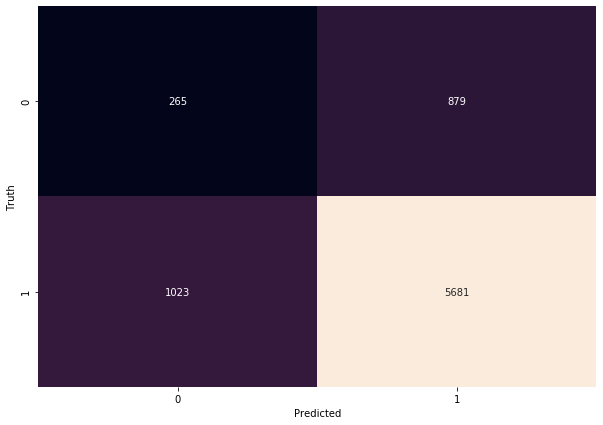

In [47]:
y_predicted  = dt.predict(x_test)
cm = confusion_matrix(y_test , y_predicted)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, cbar=False, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

##### 5. Confusion Matrix for XGBoost predictions

Text(69.0, 0.5, 'Truth')

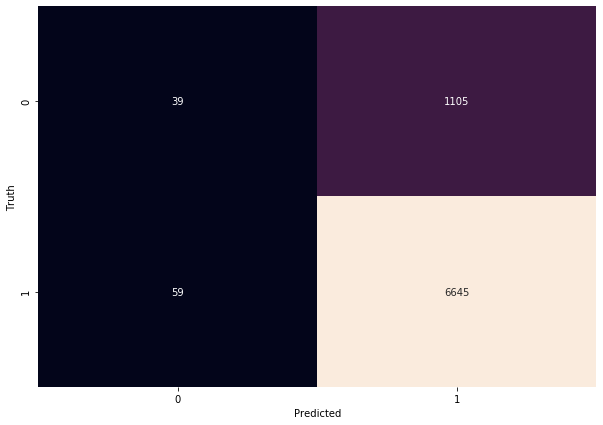

In [51]:
y_predicted  = model.predict(x_test)
cm = confusion_matrix(y_test , y_predicted)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, cbar=False, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

##### 6. Confusion Matrix for Neural Network predictions

In [86]:
y_predicted = model.predict_classes(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.8375382262996942

Text(69.0, 0.5, 'Truth')

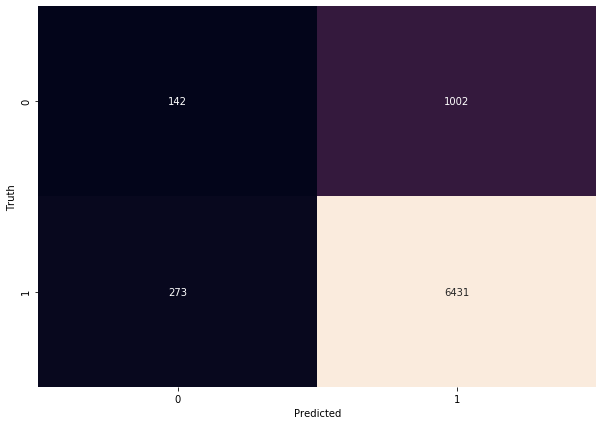

In [87]:
cm = confusion_matrix(y_test , y_predicted)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, cbar=False, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

##### with dropout included

In [109]:
y_predicted = model.predict_classes(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.854230377166157

Text(69.0, 0.5, 'Truth')

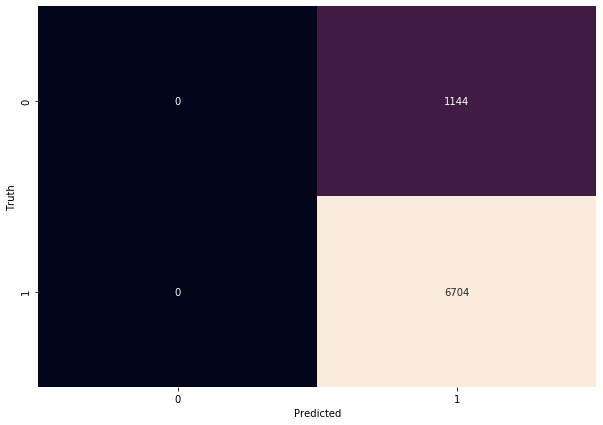

In [110]:
cm = confusion_matrix(y_test , y_predicted)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, cbar=False, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')